## 오픈소스 프로젝트

In [1]:
# 모듈 import, 필요에 따라 더 추가
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font="NanumGothic",rc={"axes.unicode_minus":False})

#### 데이터셋 불러오기
###### trafficDay=서울시 일일 버스 이용량 데이터
###### weather=서울시 강수 정보

In [2]:
forders_time=os.listdir("서울특별시 공공자전거 이용정보(시간대별)_2021년")
forders_month=os.listdir("서울특별시 공공자전거 이용정보(월별)_2021년")
df_time=pd.DataFrame()  # 이 부분의 데이터를 불러오지 못했다.
df_month=pd.DataFrame()
df_location=pd.read_csv("공공자전거 대여소 정보(21.12월 기준).csv",encoding='cp949')
df_member=pd.read_csv("서울특별시 공공자전거 신규가입자 정보(일별).csv",encoding='cp949')
'''
이 부분 오류가 난다.
이유 : csv파일 내에 데이터들 외적으로 텍스트 박스같은 것이 삽입 되어있을 수 있다.
이를 확인해보고, 삭제한 후 다시 csv파일로 바꾸어 저장하면 해결될 것 같다.
기본적으로 encoding방법은 cp949이다.

for i in range(len(forders_time)):
    file="서울특별시 공공자전거 이용정보(시간대별)_2021년/"+forders_time[i]
    df=pd.read_csv(file,encoding="cp949")
    df_time=pd.concat([df_time,df])
'''

for i in range(len(forders_month)):
    file="서울특별시 공공자전거 이용정보(월별)_2021년/"+forders_month[i]
    df=pd.read_csv(file,encoding="cp949")
    df_month=pd.concat([df_month,df])

#### 데이터 셋 확인
###### 어떤 데이터들이 있는지 확인해보기 위해 맨 위의 5개의 행을 불러온다.

In [3]:
df_month.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),이용거리(M),이용시간(본)
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25.0,NaN,NaN
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166.0,NaN,NaN
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13.0,NaN,NaN
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47.0,NaN,NaN
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134.0,NaN,NaN


In [4]:
df_month.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),이용거리(M),이용시간(본)
102921,2021-12,9999,상담센터,정기,M,AGE_005,2,77.06,0.64,2780.0,31.0,NaN,NaN
102922,2021-12,9999,상담센터,정기,M,AGE_006,1,6.38,0.05,230.1,2.0,NaN,NaN
102923,2021-12,9999,상담센터,정기,M,AGE_008,2,82.11,0.74,3190.0,28.0,NaN,NaN
102924,2021-12,88888,88888.영남배송,정기,M,AGE_006,1,0.00,0.00,0.0,17.0,NaN,NaN
102925,2021-12,99999,99999. 영남단말기정비,정기,\N,AGE_008,4,0.00,0.00,0.0,5.0,NaN,NaN


In [5]:
df_location.head(20)  #None값이 많이 존재(NaN값이 많이 존재해서 이상해서, 20개 띄웠다.)

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.5556488,126.9106293,2015-09-06,20,NaN,LCD
5,103.0,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.55495071,126.9108353,2015-09-06,14,NaN,LCD
6,104.0,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.55062866,126.9149857,2015-09-06,13,NaN,LCD
7,105.0,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.55000687,126.9148254,2015-09-06,5,NaN,LCD
8,106.0,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.54864502,126.9128265,2015-09-06,10,NaN,LCD
9,107.0,신한은행 서교동금융센터점 앞,마포구,서울특별시 마포구 월드컵북로 35,37.55751038,126.9185028,2015-09-06,5,NaN,LCD


In [6]:
df_member.head(10)

,가입일자,사용자코드,연령대코드,성별,가입 수
0,2018-07-20,회원-내국인,10대,NaN,221
1,2018-07-20,회원-내국인,20대,NaN,1189
2,2018-07-20,회원-내국인,30대,NaN,348
3,2018-07-20,회원-내국인,40대,NaN,201
4,2018-07-20,회원-내국인,50대,NaN,91
5,2018-07-20,회원-내국인,60대,NaN,16
6,2018-07-20,회원-내국인,70대이상,NaN,3
7,2018-07-21,회원-내국인,10대,NaN,270
8,2018-07-21,회원-내국인,20대,NaN,1329
9,2018-07-21,회원-내국인,30대,NaN,385


In [7]:
df_member.tail(10)

,가입일자,사용자코드,연령대코드,성별,가입 수
15788,2021-12-31,회원-내국인,40대,M,3
15789,2021-12-31,회원-내국인,40대,M,22
15790,2021-12-31,회원-내국인,50대,F,14
15791,2021-12-31,회원-내국인,50대,M,4
15792,2021-12-31,회원-내국인,50대,M,13
15793,2021-12-31,회원-내국인,60대,F,7
15794,2021-12-31,회원-내국인,60대,M,2
15795,2021-12-31,회원-내국인,60대,M,10
15796,2021-12-31,회원-내국인,70대이상,F,3
15797,2021-12-31,회원-내국인,70대이상,M,1


### 결측치 처리
###### 위의 데이터들을 확인한 후 결측치를 처리한다.

In [8]:
# df_month 결측치 확인(각 열별로 결측치가 몇개씩 존재하는지 확인)
df_month.info()

'''
결과를 보면 알 수 있지만, 대여일자, 대여소번호는 non-null값의 개수가 일치하는 반면,
성별과 이동거리, 이용시간, 이용거리, 이용시간 부분은 대여일자, 대여소 번호에 비하면 그 수가 적음을 확인할 수 있다.
이는 none값이 존재함을 의미. 이 때  None값을 대체해야할지, 그대로 둘 지, 제거할 지를 정해야한다.
해당 데이터만을 보고 성별을 예측할 수 없기 때문에 성별은 none값을 제거하고
이동거리와 이용거리는 같은 탭인것 같기 때문에 이는 데이터 가공시에 조건문으로 처리한다.(그대로 둔다는 의미)
'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323515 entries, 0 to 102925
Data columns (total 13 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   대여일자     1323515 non-null  object 
 1   대여소번호    1323515 non-null  int64  
 2   대여소명     1323515 non-null  object 
 3   대여구분코드   1323515 non-null  object 
 4   성별       1151062 non-null  object 
 5   연령대코드    1323515 non-null  object 
 6   이용건수     1323515 non-null  int64  
 7   운동량      1323515 non-null  object 
 8   탄소량      1323515 non-null  object 
 9   이동거리(M)  1195102 non-null  float64
 10  이용시간(분)  1195102 non-null  float64
 11  이용거리(M)  128413 non-null   float64
 12  이용시간(본)  128413 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 141.4+ MB


'\n결과를 보면 알 수 있지만, 대여일자, 대여소번호는 non-null값의 개수가 일치하는 반면,\n성별과 이동거리, 이용시간, 이용거리, 이용시간 부분은 대여일자, 대여소 번호에 비하면 그 수가 적음을 확인할 수 있다.\n이는 none값이 존재함을 의미. 이 때  None값을 대체해야할지, 그대로 둘 지, 제거할 지를 정해야한다.\n해당 데이터만을 보고 성별을 예측할 수 없기 때문에 성별은 none값을 제거하고\n이동거리와 이용거리는 같은 탭인것 같기 때문에 이는 데이터 가공시에 조건문으로 처리한다.(그대로 둔다는 의미)\n'

In [9]:
# 결측치 처리 (2)
df_month=df_month.fillna(0)

### 이동거리/평균사용시간이 높은 대여소는?

In [48]:
# 현재 이동거리와 이용거리 둘 중 하나만 존재하므로 이를 더해서 이용건수로 나누어준 뒤, 필요한 열만 남긴다.
df_month['거리(M)']=(df_month['이동거리(M)']+df_month['이용거리(M)'])/df_month['이용건수']
dfDis=df_month.loc[:,['대여소명','거리(M)']]
dfDis

,대여소명,거리(M)
0,중랑센터,860.000000
1,중랑센터,1126.407273
2,중랑센터,2291.050000
3,상암센터 정비실,15209.580000
4,상암센터 정비실,2440.433333
...,...,...
102921,상담센터,1390.000000
102922,상담센터,230.100000
102923,상담센터,1595.000000
102924,88888.영남배송,0.000000


In [49]:
#각 대여소별 이용거리 평균을 내림차순으로 정렬한다. 그 후, 상위 10개의 행을 뽑아서 저장
disave=dfDis.groupby(['대여소명'],as_index=False).mean().sort_values(by='거리(M)',ascending=False)
disave=disave[:10]
disave

,대여소명,거리(M)
701,1858. 석수역1번출구 앞 (SK주유소),8347.416285
671,1827. 독산보도육교 앞 자전거 보관소,7503.337808
799,2025. 흑석역 1번출구,6985.098320
1621,3627. 압구정나들목,6807.122483
808,2037. 동작역 5번출구 동작주차공원,6739.656967
1661,3677. 강동구음식물재활용센터,6713.269398
704,1861.IBK기업은행 석수역 지점 앞,6702.037407
1028,2314. 청담나들목입구,6632.590357
2344,565. 옥수역 3번출구,6620.452153
2673,9990_도봉센터,6540.000000


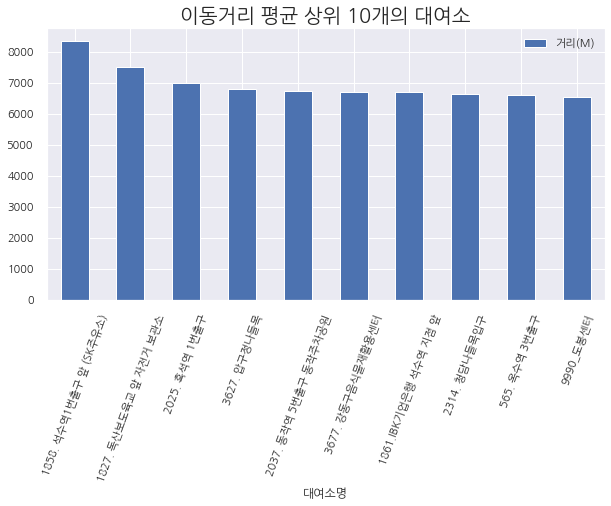

In [50]:
# 이동거리 시각화 (막대그래프 사용)
disfig=disave.plot(x='대여소명',y='거리(M)',kind="bar",figsize=(10,5))
disfig.set_title("이동거리 평균 상위 10개의 대여소",fontsize=20)
plt.xticks(rotation=70)
plt.show()

In [52]:
# 현재 이용시간(분)과 이용시간(본) 둘 중 하나만 존재하므로 이를 더해서 이용건수로 나눠준 뒤, 필요한 열만 남긴다.
df_month['이용시간 (분)']=(df_month['이용시간(분)']+df_month['이용시간(본)'])/df_month['이용건수']
df_time=df_month.loc[:,['대여소명','이용시간 (분)']]
df_time

,대여소명,이용시간 (분)
0,중랑센터,12.500000
1,중랑센터,15.090909
2,중랑센터,13.000000
3,상암센터 정비실,47.000000
4,상암센터 정비실,22.333333
...,...,...
102921,상담센터,15.500000
102922,상담센터,2.000000
102923,상담센터,14.000000
102924,88888.영남배송,17.000000


In [53]:
# 평균 이용시간 상위 10개의 대여소들을 출력한다.
timeave=df_time.groupby(['대여소명'],as_index=False).mean().sort_values(by='이용시간 (분)',ascending=False)
timeave=timeave[:10]
timeave

,대여소명,이용시간 (분)
2673,9990_도봉센터,69.000000
701,1858. 석수역1번출구 앞 (SK주유소),60.996900
808,2037. 동작역 5번출구 동작주차공원,56.252843
1014,2301. 현대고등학교 건너편,54.915696
1661,3677. 강동구음식물재활용센터,54.698919
671,1827. 독산보도육교 앞 자전거 보관소,54.032865
1573,3552.서울숲 공영주차장앞,53.362297
1621,3627. 압구정나들목,52.576397
978,2262. 한신16차아파트 119동 앞,52.538975
1153,249. 여의도중학교 옆,52.318514


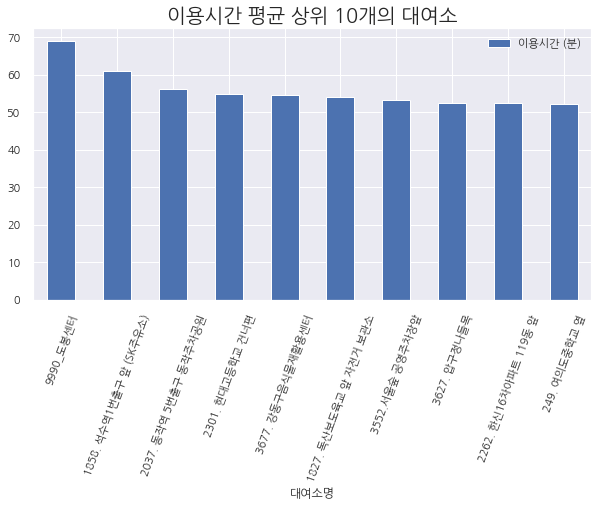

In [55]:
# 이용시간 시각화 (막대그래프 사용)
timefig=timeave.plot(x='대여소명',y='이용시간 (분)',kind="bar",figsize=(10,5))
timefig.set_title("이용시간 평균 상위 10개의 대여소",fontsize=20)
plt.xticks(rotation=70)
plt.show()

### 운동량과 이동거리의 상관관계

In [40]:
# 운동량과 이동거리의 상관관계 (1)

In [41]:
# 운동량과 이동거리의 상관관계 (2)

### 따릉이를 가장 많이 이용하는 성별/연령대

In [42]:
# 따릉이를 가장 많이 이용하는 성별/연령대 (1)

In [43]:
# 따릉이를 가장 많이 이용하는 성별/연령대 (2)

### 서울시 구별 대여소 및 거치대의 개수

In [26]:
#데이터불러오기 
#cp949 인코딩 사용 한글 데이터 커버
#각종 패키지 불러오기
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
font_path = './NanumGothic.ttf' # 나눔고딕폰트 사용
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False #minus 폰트깨짐 방지

plt.style.use('seaborn')
sns.set(font="NanumGothic", 
rc={"axes.unicode_minus":False}) #seaborn 한글폰트사용

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
Data1 = pd.read_csv('data-set/공공자전거 대여소 정보(21.01.31 기준).csv', encoding = 'cp949')

In [27]:
#데이터 확인 -> 컬럼명 수정 및 결측치 확인한다
Data1.head(10)

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12,NaN,LCD
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8,NaN,LCD
7,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7,QR
8,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16,NaN,LCD
9,306.0,광화문역 7번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.570808,126.976433,2015-10-07,19,NaN,LCD


In [28]:
#컬럼 가공
#컬럼명 변경(Unnamed -> 이름 붙여준다)
Data1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']

#불필요 칼럼 제거 (상세주소, 운영방식 컬럼은 불필요)
Data1 = Data1.drop(['상세주소', '운영방식'], axis = 1, inplace = False)

In [29]:
#결측치 처리 (qr, lcd 결측치0으로 변경, 대여소번호 ==Nan 삭제)
Data1['거치대수lcd'] = Data1['거치대수lcd'].fillna(0) 
Data1['거치대수qr'] = Data1['거치대수qr'].fillna(0)
Data1 = Data1.dropna(subset=['대여소번호'])
Data1 = Data1.dropna(subset=['위도'])
Data1 = Data1.dropna(subset=['설치시기'])
#거치대수로 통일 및 형변환
Data1['거치대수lcd'] = pd.to_numeric(Data1['거치대수lcd'])
Data1['거치대수qr'] = pd.to_numeric(Data1['거치대수qr'])
Data1['거치대수'] = Data1['거치대수qr'] + Data1['거치대수lcd']

Data1 = Data1.drop(['거치대수qr', '거치대수lcd'], axis = 1, inplace = False)

Data1.head()

,대여소번호,대여소명,자치구,위도,경도,설치시기,거치대수
4,301.0,경복궁역 7번출구 앞,종로구,37.575794,126.971451,2015-10-07,16
5,302.0,경복궁역 4번출구 뒤,종로구,37.575947,126.974060,2015-10-07,12
6,303.0,광화문역 1번출구 앞,종로구,37.571770,126.974663,2015-10-07,8
7,304.0,광화문역 2번출구 앞,종로구,37.572113,126.977577,2021-01-26,7
8,305.0,종로구청 옆,종로구,37.572582,126.978355,2015-10-07,16


In [30]:
#결측치 제거 확인
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 4 to 2157
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2040 non-null   float64
 1   대여소명    2040 non-null   object 
 2   자치구     2040 non-null   object 
 3   위도      2040 non-null   object 
 4   경도      2040 non-null   object 
 5   설치시기    2040 non-null   object 
 6   거치대수    2040 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 127.5+ KB


* 자치구별 거치대 개수 

In [31]:
#자치구별 대여소 개수 데이터 그룹핑
Holder = Data1.groupby('자치구')['거치대수'].sum()
Holder.sort_values(ascending = False, inplace = True)
Holder.head()

자치구
송파구     1720
강서구     1677
서초구     1591
강남구     1482
영등포구    1475
Name: 거치대수, dtype: int64

* 자치구별 대여소 개수

In [33]:
#자치구별 거치대 개수 데이터 그룹핑
Rental = Data1.groupby(by = ['자치구']).size()
Rental.sort_values(ascending = False, inplace = True)
Rental.head()

자치구
송파구     129
강서구     120
강남구     118
서초구     118
영등포구    106
dtype: int64

* 연도별 설치 개수 변화

* 대여소 분포

In [ ]:
#위도 경도 이용해서 대여소간 분포 파악
#평균거리 산출하여 지역별 대여소 거리 막대그래프 시각화
#분포 지도로 표현예정

### 서울시 구별로 이용량

* 시간에 따른 구별 이용량 변화

In [46]:
# 대여소별 이용정보 추후에 18~21년까지 이용정보 데이터 셋 병합 후 업로드 예정  
Data2 = pd.read_csv('data-set/대여소별 이용정보(21.7-21.12).csv', encoding = 'cp949')

In [47]:
# 서울시 구별로 거치대 개수와 대여건수 (2)

### 신규가입인원 대비 실제 이용자수

In [48]:
# 신규가입인원 대비 실제 이용자수 (1)

In [49]:
# 신규가입인원 대비 실제 이용자수 (2)